<a href="https://colab.research.google.com/github/Armestrong/data_science_titanic/blob/master/01_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset de treino (train.csv)
Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não.
Composto por diversas features como gênero do passageiro e classe do embarque.
# Dataset de Teste (test.csv)
Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.


In [0]:


# importar os pacotes necessários
import pandas as pd
import numpy as np
#biblioteca de visualização de dados do Python, gera um grafico em duas dimensoes, linha coluna x e y
#link para mais informaçoes https://paulovasconcellos.com.br/15-comandos-de-matplotlib-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-17cf88a75119
import matplotlib.pyplot as plt
#biblioteca de visualização 
import seaborn as sns

In [0]:
# baixar o arquivo train.csv
!wget https://raw.githubusercontent.com/Armestrong/data_science_titanic/master/data/train.csv
!wget https://raw.githubusercontent.com/Armestrong/data_science_titanic/master/data/test.csv
# ver o diretório
!ls -l

In [54]:
# renderizar/acoplando os dados em  um gráficos diretamento no notebook
# %matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#le as primeiras 5 linhas dos dados 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
#verificar as dimensões do DataFrame = matriz
#função *shape* pegar o total de valores de uma linha e coluna

print("Entradas = Linhas\t{}\nVariaveis = Colunas:\t{}".format(test.shape[0], train.shape[1]))

Entradas = Linhas	418
Variaveis = Colunas:	12


In [0]:
#identificar o tipo de cada variavel
display(train.dtypes)
display(train.head)
train.head()

# Dicionário de Dados



*  PassengerId: Número de identificação do passageiro
*   Survived: Informa se o passageiro sobreviveu ao desastre
>0 = Não  
>1 = Sim
*   Pclass: Classe do bilhete
>1 = 1ª Classe  
>2 = 2ª Classe  
>3 = 3ª Classe
*   Name: Nome do passageiro
*   Sex: Sexo do passageiro
*   Age: Idade do passageiro
*   SibSp: Quantidade de cônjuges e irmãos a bordo
*   Parch: Quantidade de pais e filhos a bordo
*   Ticket: Número da passagem
*   Fare: Preço da Passagem
*   Cabin: Número da cabine do passageiro
*   Embarked: Porto no qual o passageiro embarcou
> C = Cherbourg  
> Q = Queenstown  
> S = Southampton

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
> * Discretas
>  * Pclass
>  * SibSp
>  * Parch
> * Contínuas
>  * Age
>  * Fare
> * Alvo
>  * Survived
> * Chave Primária
>  * PassengerId
> * Variáveis Categóricas
>  * Name
>  *Sex
>  * Ticket
>  * Cabin
>  * Embarked

Q2. Qual a porcentagem de valores faltantes?

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [53]:
#ver a porcentagem de valores faltantes
#link sobre função isnull https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

 **FUNÇÃO DESCRIBE**
*   count - quantidade de entradas válidas
*   mean - média dos valores
*   std - desvio padrão
*   min - menor valor da coluna
*   25% - percentil 25
*   50% - percentil 50 (e mediana)
*   75% - percentil 75
*   max - maior valor da coluna







In [55]:
# mostra a estatistica dos dados
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


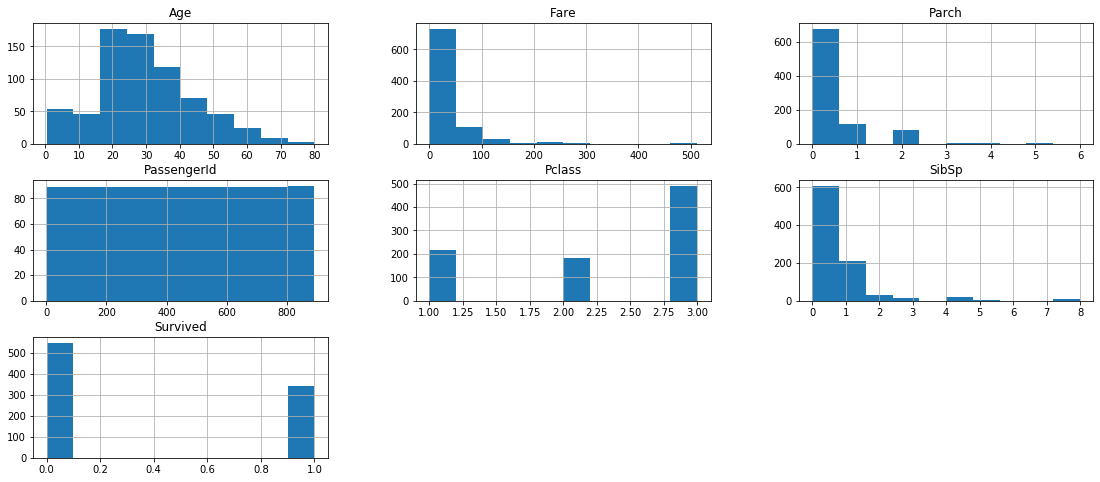

In [62]:
#ver o historiograma das variaveis numericas
train.hist(figsize=(19,8));

Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??

In [67]:
#Analisar a probabilidade de sobreviventes pelo Sexo
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


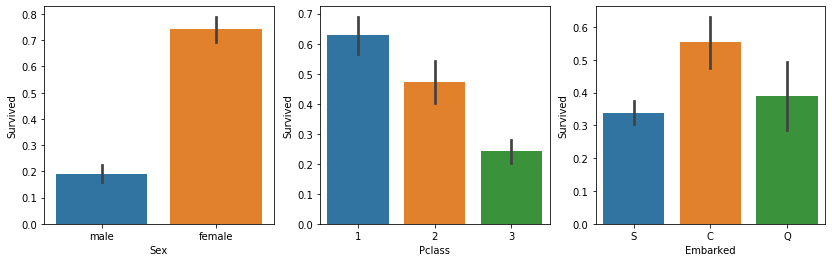

In [71]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(14,4))

# função  - linha  - coluna   -  link do dado - bloco/ caixa de criação
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

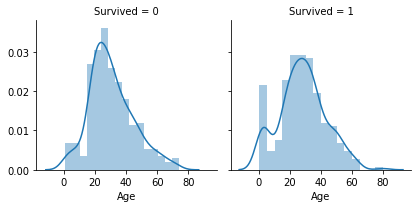

In [87]:
#Ver a influencia da idade na probabilidade de sobrevivencia
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age') 


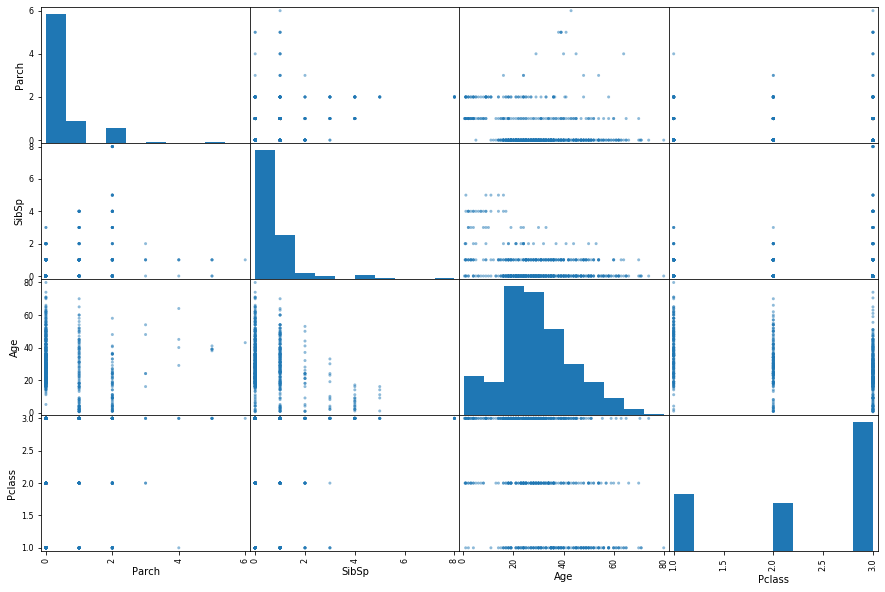

In [88]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

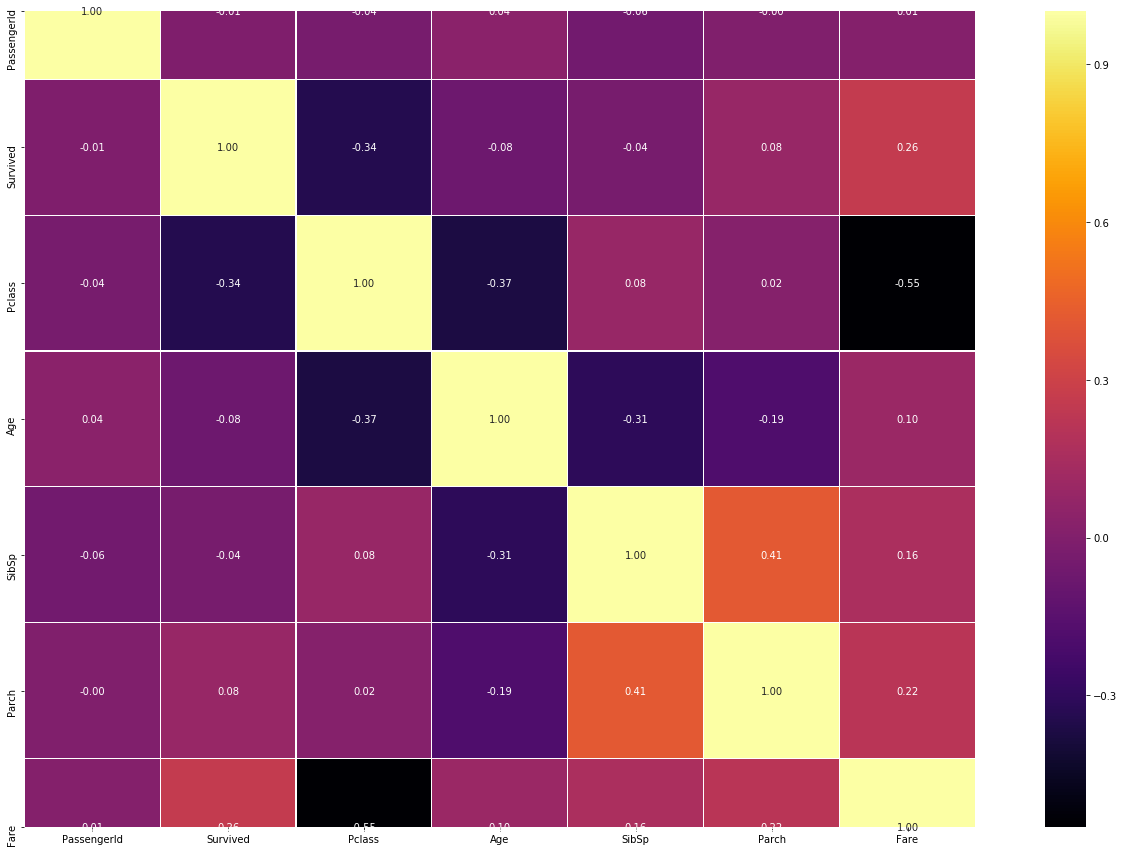

In [124]:
# plotar o heatmap para as variáveis numéricas

plt.subplots(figsize=(25,15))
sns.heatmap(train.corr(), cmap='inferno', fmt='.2f', square=True, linewidths=0.1,
vmax=1.0, linecolor='white', annot=True);

